# Libraries

# **Time Series and Machine Learning Primer**

## time series and aplications

**Plotting a time series (I)**

In this exercise, you'll practice plotting the values of two time series without the time component.

Two DataFrames, data and data2 are available in your workspace.

Unless otherwise noted, assume that all required packages are loaded with their common aliases throughout this course.

Note: This course assumes some familiarity with time series data, as well as how to use them in data analytics pipelines. For an introduction to time series, we recommend the Introduction to Time Series Analysis in Python and Visualizing Time Series Data with Python courses.

In [ ]:
# Plot the time series in each dataset
fig, axs = plt.subplots(2, 1, figsize=(5, 10))
data.iloc[:1000].plot(y="data_values", ax=axs[0])
data2.iloc[:1000].plot(y="data_values", ax=axs[1])
plt.show()

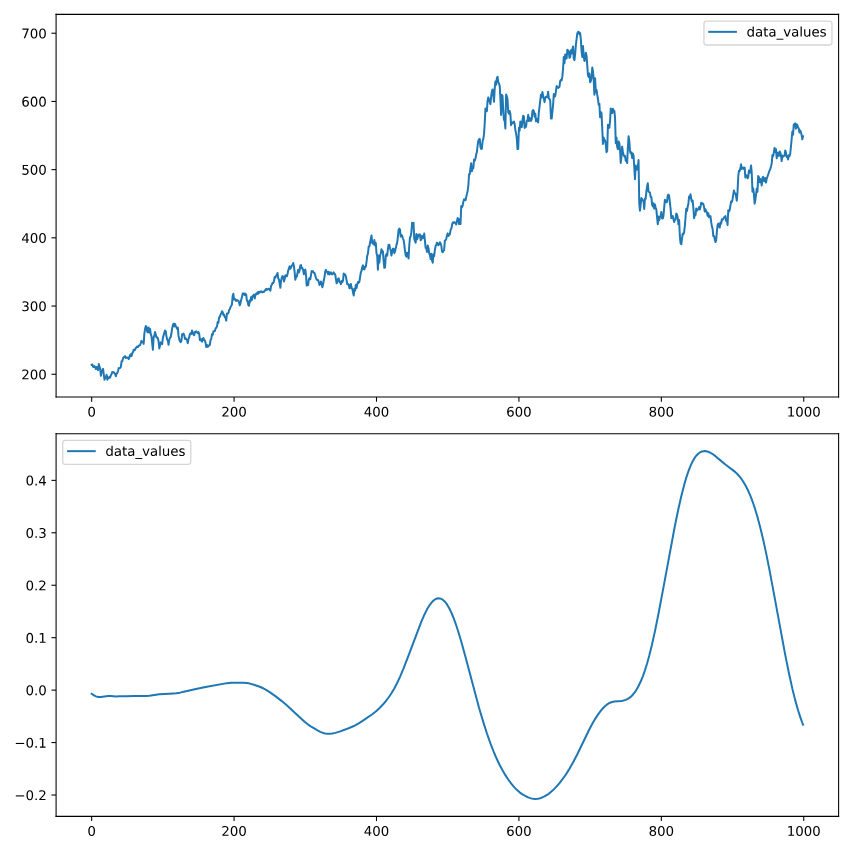

**Plotting a time series (II)**

You'll now plot both the datasets again, but with the included time stamps for each (stored in the column called "time"). Let's see if this gives you some more context for understanding each time series data.

In [ ]:
# Plot the time series in each dataset
fig, axs = plt.subplots(2, 1, figsize=(5, 10))
data.iloc[:1000].plot(x="time", y="data_values", ax=axs[0])
data2.iloc[:1000].plot(x="time", y="data_values", ax=axs[1])
plt.show()

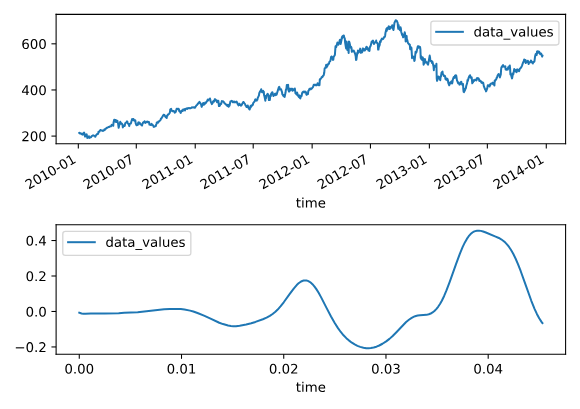

## Machine learning basics

**Fitting a simple model: classification**

In this exercise, you'll use the iris dataset (representing petal characteristics of a number of flowers) to practice using the scikit-learn API to fit a classification model. You can see a sample plot of the data to the right.

In [ ]:
from sklearn.svm import LinearSVC

# Construct data for the model
X = data.loc[:,["petal length (cm)","petal width (cm)"]]
y = data[['target']]

# Fit the model
model = LinearSVC()
model.fit(X, y)

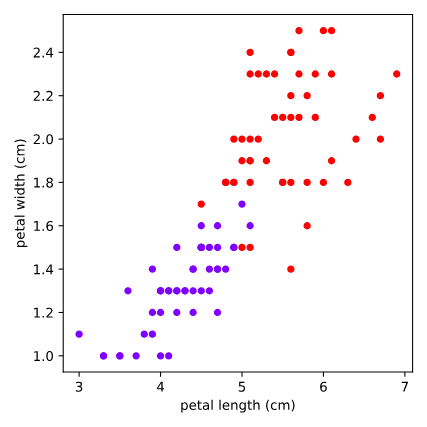

**Predicting using a classification model**

Now that you have fit your classifier, let's use it to predict the type of flower (or class) for some newly-collected flowers.

Information about petal width and length for several new flowers is stored in the variable targets. Using the classifier you fit, you'll predict the type of each flower.

In [ ]:
# Create input array
X_predict = targets[['petal length (cm)', 'petal width (cm)']]

# Predict with the model
predictions = model.predict(X_predict)
print(predictions)

# Visualize predictions and actual values
plt.scatter(X_predict['petal length (cm)'], X_predict['petal width (cm)'],
            c=predictions, cmap=plt.cm.coolwarm)
plt.title("Predicted class values")
plt.show()

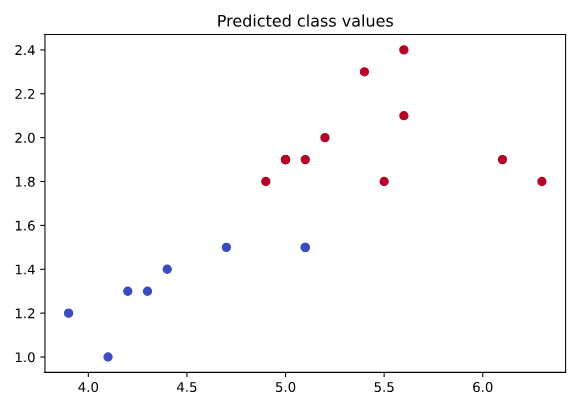

**Fitting a simple model: regression**

In this exercise, you'll practice fitting a regression model using data from the California housing market. A DataFrame called housing is available in your workspace. It contains many variables of data (stored as columns). Can you find a relationship between the following two variables?

"MedHouseVal": the median house value for California districts (in $100,000s of dollars)
"AveRooms" : average number of rooms per dwelling

In [ ]:
from sklearn import linear_model

# Prepare input and output DataFrames
X = housing.loc[:,["MedHouseVal"]]
y = housing.loc[:,["AveRooms"]]

# Fit the model
model = linear_model.LinearRegression()
model.fit(X,y)

In [ ]:
# Generate predictions with the model using those inputs
predictions = model.predict(new_inputs.reshape(-1,1))

# Visualize the inputs and predicted values
plt.scatter(new_inputs, predictions, color='r', s=3)
plt.xlabel('inputs')
plt.ylabel('predictions')
plt.show()

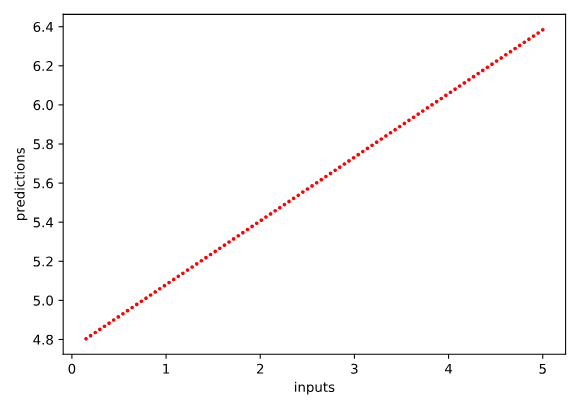

## Machine learning and time series data

**Inspecting the classification data**

In these final exercises of this chapter, you'll explore the two datasets you'll use in this course.

The first is a collection of heartbeat sounds. Hearts normally have a predictable sound pattern as they beat, but some disorders can cause the heart to beat abnormally. This dataset contains a training set with labels for each type of heartbeat, and a testing set with no labels. You'll use the testing set to validate your models.

As you have labeled data, this dataset is ideal for classification. In fact, it was originally offered as a part of a public Kaggle competi

https://www.kaggle.com/datasets/kinguistics/heartbeat-sounds?select=set_b.csvtion.

In [5]:
import librosa as lr
from glob import glob

In [36]:
archivo="./audio/audio_munged.hdf5"
data_dir="./audio/"

In [37]:
# List all the hdf5 files in the folder
audio_files = glob(data_dir + '*.hdf5')

In [38]:
audio_files

['./audio\\audio_munged.hdf5', './audio\\audio_munged2.hdf5']

In [ ]:
import librosa as lr
from glob import glob

# List all the wav files in the folder
audio_files = glob(data_dir + '/*.wav')

# Read in the first audio file, create the time array
audio, sfreq = lr.load(audio_files[0])
time = np.arange(0, len(audio)) / sfreq

# Plot audio over time
fig, ax = plt.subplots()
ax.plot(time, audio)
ax.set(xlabel='Time (s)', ylabel='Sound Amplitude')
plt.show()

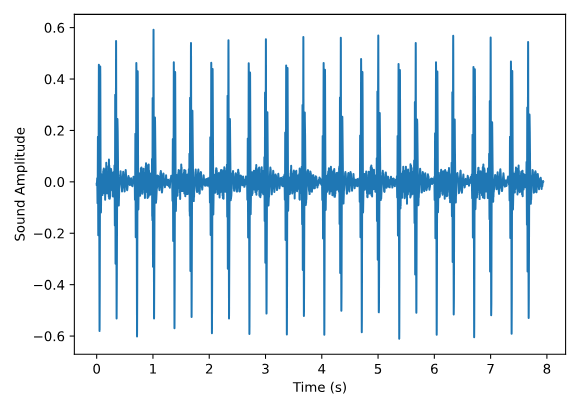

**Inspecting the regression data**

The next dataset contains information about company market value over several years of time. This is one of the most popular kind of time series data used for regression. If you can model the value of a company as it changes over time, you can make predictions about where that company will be in the future. This dataset was also originally provided as part of a public Kaggle competition.

In this exercise, you'll plot the time series for a number of companies to get an understanding of how they are (or aren't) related to one anoth
https://www.kaggle.com/datasets/dgawlik/nyseer.

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
# Read in the data
data = pd.read_csv('./prices/prices.csv', index_col=0)

# Convert the index of the DataFrame to datetime
data.index = pd.to_datetime(data.index)
print(data.head())


           symbol       close       volume
date                                      
2010-01-04   AAPL  214.009998  123432400.0
2010-01-04    ABT   54.459951   10829000.0
2010-01-04    AIG   29.889999    7750900.0
2010-01-04   AMAT   14.300000   18615100.0
2010-01-04   ARNC   16.650013   11512100.0


In [65]:
# Pivotear el DataFrame
pivot_df = data.pivot(columns='symbol', values='close')

In [66]:
stocks_values=pivot_df.loc[:,["AAPL","FB","NFLX","V","XOM"]]

In [67]:
stocks_values

symbol,AAPL,FB,NFLX,V,XOM
date,,,,,
2010-01-04,214.009998,NaN,53.479999,88.139999,69.150002
2010-01-05,214.379993,NaN,51.510001,87.129997,69.419998
2010-01-06,210.969995,NaN,53.319999,85.959999,70.019997
2010-01-07,210.580000,NaN,52.400001,86.760002,69.800003
2010-01-08,211.980005,NaN,53.300002,87.000000,69.519997
...,...,...,...,...,...
2016-12-23,116.519997,117.269997,125.589996,78.150002,90.709999
2016-12-27,117.260002,118.010002,128.350006,78.349998,90.750000
2016-12-28,116.760002,116.919998,125.889999,78.300003,90.300003


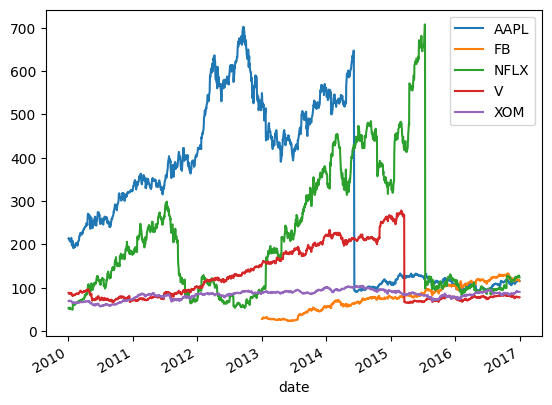

In [68]:
# Loop through each column, plot its values over time
fig, ax = plt.subplots()
for column in stocks_values.columns:
    stocks_values[column].plot(ax=ax, label=column)
ax.legend()
plt.show()

# Time Series as Inputs to a Model

## Classifying a time series